### Initializations

Import third-party and built-in modules

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import pathlib, itertools as it

Import the fertilization module

In [2]:
from fertilization import *

Define folder for files output (adapt as needed)

In [3]:
base_dir = pathlib.Path(".").resolve()

Make sure that `.svg` exports have editable texts

In [4]:
old_fonttype = plt.rcParams['svg.fonttype']

In [5]:
plt.rcParams['svg.fonttype'] = 'none'

## Multiple egg groups

One group of sperm, speed = 100 μm/s constant, % motile = 80% constant, concentration ranges logrithmically from 10 sperms per mL to 100000 sperms per mL

In [6]:
v_const = np.array([100E-6])
d_const = np.array([0.0])

def v_sperm(t):
    return v_const

def d_sperm(t):
    return d_const

# 10**(1+6) to 10**(5+6)
Sinit_array = np.logspace(1 + 6, 5 + 6, (5 - 1) * 16 + 1, base=10)

motile = 0.80

Blocking time scale for polyspermy: 3.0 second

In [7]:
Dt_poly = 3.0

Fertilization time: 1 hour = 60 minutes = 3600 seconds

In [8]:
t_end = 60 * 60 # = 60 minutes
t_array = np.arange(t_end / 4, t_end + 1, t_end / 4)

### Case (a): all eggs normal

One group of egg, cell (+ jelly) diameter D = 120μm, concentration 50 eggs/mL, fertilization probability given hit (fertilizability) = 0.1.

_Note_ that cross sectional area $\sigma_0 = \pi r^2 = \pi (D/2)^2$

In [9]:
sigma0_gd = np.array([
    np.pi * (0.5 * 120E-6)**2,
])
alpha_const_gd = np.array([[0.1]])
Einit_gd = np.array([50E6])

In [10]:
def a_egg_gd(t):
    return alpha_const_gd

Initialize arrays for $S_0$, $E_*$, and $E_\text{poly}$

In [11]:
S0_S_array_gd = np.zeros([Sinit_array.size, t_array.size])
Eany_S_array_gd = np.zeros([Sinit_array.size, t_array.size])
Epoly_S_array_gd = np.zeros([Sinit_array.size, t_array.size])

Loop through sperm concentration

_Note_ that `S_init` in the motile sperm concentration, so `_S` needs to be multiplied by `motile`

In [12]:
for _i, _S in enumerate(Sinit_array):
    model_S = FertilizationModel(
        v_sperm, d_sperm, np.array([_S * motile]),
        a_egg_gd, sigma0_gd, Einit_gd,
        t_end
    )
    model_S.solve_S0()
    model_S.solve_pmn()
    S0_S_array_gd[_i, :] = model_S.S0(t_array)[0]
    Eany_S_array_gd[_i, :] = model_S.E_any(t_array)[0]
    Epoly_S_array_gd[_i, :] = model_S.E_poly(t_array, Dt_poly)[0, 0]

Calculate proportion of (a) free live sperms, (b) fertilized eggs, and (c) polyspermic eggs

In [13]:
norm_S0_S_gd = S0_S_array_gd / Sinit_array[:, np.newaxis]
norm_Eany_S_gd = Eany_S_array_gd / Einit_gd
norm_Epoly_S_gd = Epoly_S_array_gd / Einit_gd

Plot proportion of eggs fertilized as function of sperm concentration (figure not saved)

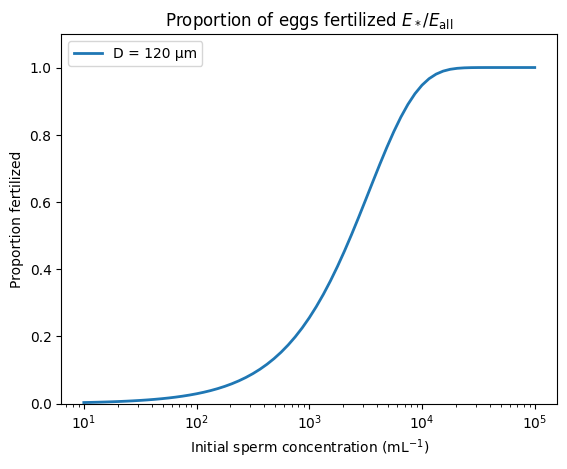

In [14]:
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_gd[:, -1], lw=2, 
    label="D = 120 μm"
)

plt.title("Proportion of eggs fertilized $E_* / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
plt.ylim([0, 1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion fertilized")
plt.legend(loc="upper left")

#plt.savefig(base_dir / 'prop_fert_good.svg')

plt.show()

Plot proportion of polyspermic eggs as function of sperm concentration (figure not saved)

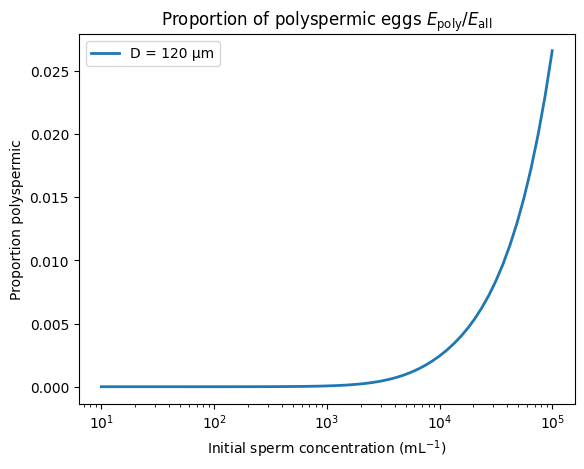

In [15]:
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_gd[:, -1], lw=2, 
    label="D = 120 μm"
)

plt.title("Proportion of polyspermic eggs $E_\\text{poly} / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
#plt.ylim([0, 1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion polyspermic")
plt.legend(loc="upper left")

# plt.savefig(base_dir / 'prop_poly_good.svg')

plt.show()

Plot proportion of free-live sperms as function of sperm concentration (not saved)

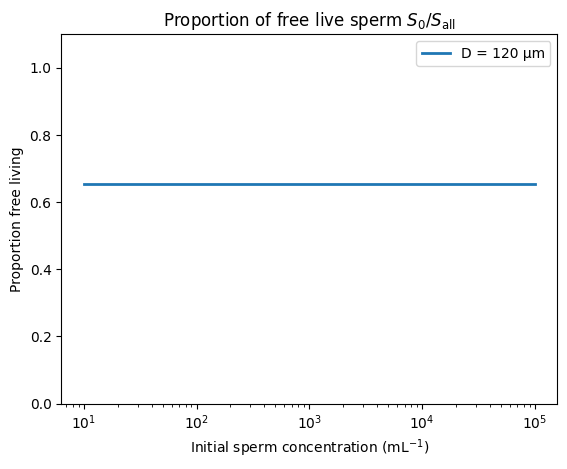

In [16]:
plt.plot(
    1E-6 * Sinit_array, norm_S0_S_gd[:, -1], lw=2, 
    label="D = 120 μm"
)

plt.title("Proportion of free live sperm $S_0 / S_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
plt.ylim([0,1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion free living")
plt.legend()

plt.show()

### Case (b): all eggs stressed

One group of egg, cell (+ jelly) diameter 90μm, concentration 50 eggs/mL, fertilizability = 0.1

In [17]:
sigma0_bd = np.array([
    np.pi * (0.5 * 90E-6)**2,
])
alpha_const_bd = np.array([[0.1]])
Einit_bd = np.array([50E6])

In [18]:
def a_egg_bd(t):
    return alpha_const_bd

Initialize arrays, loop through concentration, etc.

In [19]:
S0_S_array_bd = np.zeros([Sinit_array.size, t_array.size])
Eany_S_array_bd = np.zeros([Sinit_array.size, t_array.size])
Epoly_S_array_bd = np.zeros([Sinit_array.size, t_array.size])

In [20]:
for _i, _S in enumerate(Sinit_array):
    model_S = FertilizationModel(
        v_sperm, d_sperm, np.array([_S * motile]),
        a_egg_bd, sigma0_bd, Einit_bd,
        t_end
    )
    model_S.solve_S0()
    model_S.solve_pmn()
    S0_S_array_bd[_i, :] = model_S.S0(t_array)[0]
    Eany_S_array_bd[_i, :] = model_S.E_any(t_array)[0]
    Epoly_S_array_bd[_i, :] = model_S.E_poly(t_array, Dt_poly)[0, 0]

In [21]:
norm_S0_S_bd = S0_S_array_bd / Sinit_array[:, np.newaxis]
norm_Eany_S_bd = Eany_S_array_bd / Einit_bd
norm_Epoly_S_bd = Epoly_S_array_bd / Einit_bd

Plot proportion of eggs fertilized as function of sperm concentration for both cases, and save the resulting figure

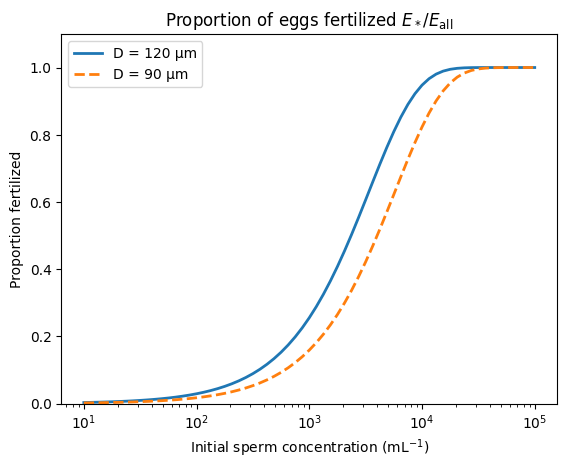

In [22]:
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_gd[:, -1], lw=2, 
    label="D = 120 μm"
)
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_bd[:, -1], lw=2, ls="--",
    label="D = 90 μm"
)

plt.title("Proportion of eggs fertilized $E_* / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
plt.ylim([0, 1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion fertilized")
plt.legend()

plt.savefig(base_dir / 'prop_fert_gd_v_bad.svg')
plt.savefig(base_dir / 'prop_fert_gd_v_bad.pdf')

plt.show()

Plot proportion of polyspermic eggs as function of sperm concentration for both cases, and save the resulting figure

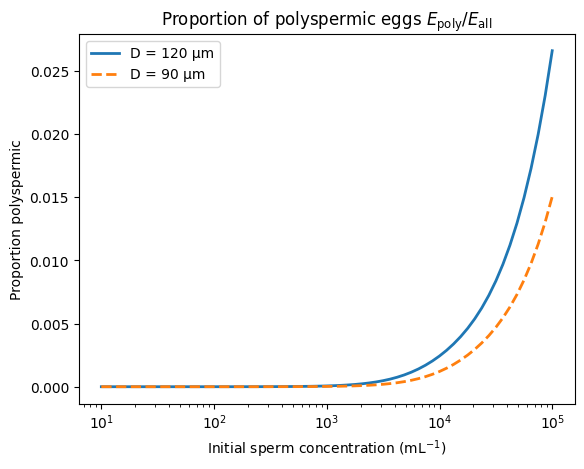

In [23]:
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_gd[:, -1], lw=2, 
    label="D = 120 μm"
)
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_bd[:, -1], lw=2, ls="--",
    label="D = 90 μm"
)

plt.title("Proportion of polyspermic eggs $E_\\text{poly} / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
#plt.ylim([0, 1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion polyspermic")
plt.legend(loc="upper left")

plt.savefig(base_dir / 'prop_poly_gd_v_bad.svg')
plt.savefig(base_dir / 'prop_poly_gd_v_bad.pdf')

plt.show()

Plot proportion of free-live sperms as function of sperm concentration for both cases (figure not saved)

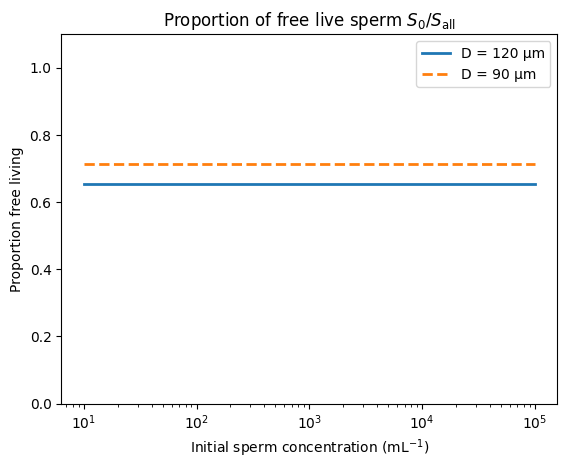

In [24]:
plt.plot(
    1E-6 * Sinit_array, norm_S0_S_gd[:, -1], lw=2, 
    label="D = 120 μm"
)

plt.plot(
    1E-6 * Sinit_array, norm_S0_S_bd[:, -1], lw=2, ls="--",
    label="D = 90 μm"
)

plt.title("Proportion of free live sperm $S_0 / S_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
plt.ylim([0, 1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion free living")
plt.legend()

plt.show()

### Case (c): Mixture of both

Two groups of eggs, with cell (+ jelly) diameters 120μm (for normal eggs) and 90μm (for stressed eggs), concentration of 25 eggs/mL per group (total = 50 eggs/mL), fertilizability = 0.1

_Note_ that $\sigma_0$ (`sigma0_mx`) and $E_\text{all}$ (`Einit_mx`) are now a 2-dim vectors, while fertilizability (`alpha_const_mx`) is now a 1-by-2 matrix 

In [25]:
sigma0_mx = np.array([
    sigma0_gd.item(),
    sigma0_bd.item()
])
alpha_const_mx = np.array([[
    alpha_const_gd.item(), 
    alpha_const_bd.item()
]])
Einit_mx_gd = 0.5 * Einit_gd.item()
Einit_mx_bd = 0.5 * Einit_bd.item()
Einit_mx = np.array([
    Einit_mx_gd, 
    Einit_mx_bd, 
])

In [26]:
def a_egg_mx(t):
    return alpha_const_mx

Initialize arrays, loop through concentration, etc.

In [27]:
S0_S_array_mx = np.zeros([Sinit_array.size, t_array.size])
Eany_S_array_mx = np.zeros([Sinit_array.size, t_array.size])
Eany_S_array_mx_gd = np.zeros([Sinit_array.size, t_array.size])
Eany_S_array_mx_bd = np.zeros([Sinit_array.size, t_array.size])
Epoly_S_array_mx = np.zeros([Sinit_array.size, t_array.size])
Epoly_S_array_mx_gd = np.zeros([Sinit_array.size, t_array.size])
Epoly_S_array_mx_bd = np.zeros([Sinit_array.size, t_array.size])

In [28]:
for _i, _S in enumerate(Sinit_array):
    model_S = FertilizationModel(
        v_sperm, d_sperm, np.array([_S * motile]),
        a_egg_mx, sigma0_mx, Einit_mx,
        t_end
    )
    model_S.solve_S0()
    model_S.solve_pmn()
    S0_S_array_mx[_i, :] = model_S.S0(t_array)[0]
    _tmp = model_S.E_any(t_array)
    Eany_S_array_mx_gd[_i, :] = _tmp[0]
    Eany_S_array_mx_bd[_i, :] = _tmp[1]
    _tmp = model_S.E_poly(t_array, Dt_poly)[0]
    Epoly_S_array_mx_gd[_i, :] = _tmp[0]
    Epoly_S_array_mx_bd[_i, :] = _tmp[1]    

In [29]:
Eany_S_array_mx = Eany_S_array_mx_gd + Eany_S_array_mx_bd
Epoly_S_array_mx = Epoly_S_array_mx_gd + Epoly_S_array_mx_bd

Calculate proportion of (a) free live sperms, (b) fertilized eggs, and (c) polyspermic eggs. For (b) and (c), calculate for each group separately, as well as the average

In [30]:
norm_S0_S_mx = S0_S_array_mx / Sinit_array[:, np.newaxis]
norm_Eany_S_mx = Eany_S_array_mx / np.sum(Einit_mx)
norm_Eany_S_mx_gd = Eany_S_array_mx_gd / Einit_mx_gd
norm_Eany_S_mx_bd = Eany_S_array_mx_bd / Einit_mx_bd
norm_Epoly_S_mx = Epoly_S_array_mx / np.sum(Einit_mx)
norm_Epoly_S_mx_gd = Epoly_S_array_mx_gd / Einit_mx_gd
norm_Epoly_S_mx_bd = Epoly_S_array_mx_bd / Einit_mx_bd

Plot proportion of eggs fertilized as function of sperm concentration for the normal, stressed, and mixed cases, and save the resulting figure

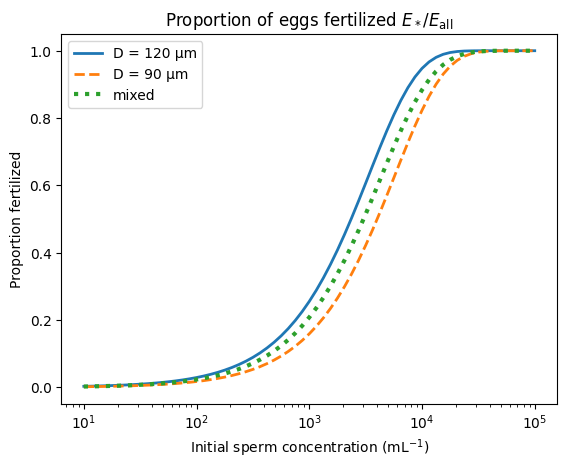

In [31]:
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_gd[:, -1], lw=2,
    label="D = 120 μm"
)
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_bd[:, -1], lw=2, ls="--", 
    label="D = 90 μm"
)
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_mx[:, -1], lw=3, ls=":",
    label="mixed"
)

plt.title("Proportion of eggs fertilized $E_* / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion fertilized")
plt.legend()

plt.savefig(base_dir / 'prop_fert_mixed.svg')
plt.savefig(base_dir / 'prop_fert_mixed.pdf')

plt.show()

Separate the mixed case by the group (normal versus stressed), and check proportion fertilized (figure not saved)

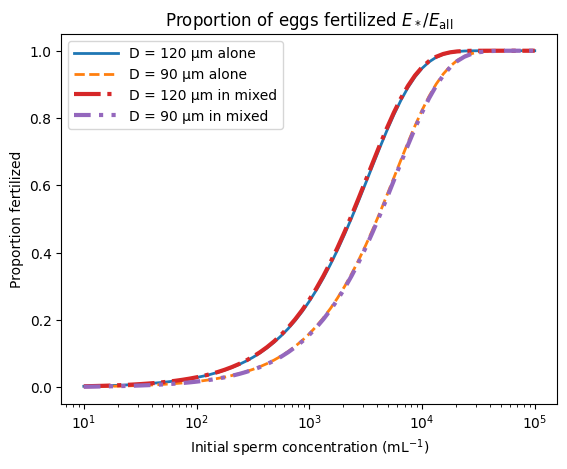

In [32]:
# custom "dash-dot-dot" linestyle
dashdotdot = (0, (4, 2, 1, 2, 1, 2))

# trick to skip colors in the default plot color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = it.cycle(prop_cycle.by_key()['color'])

plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_gd[:, -1], lw=2, 
    c=next(colors), label="D = 120 μm alone"
)
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_bd[:, -1], lw=2, ls="--",
    c=next(colors), label="D = 90 μm alone"
)

next(colors)

plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_mx_gd[:, -1], lw=3, ls="-.",
    c=next(colors), label="D = 120 μm in mixed"
)
plt.plot(
    1E-6 * Sinit_array, norm_Eany_S_mx_bd[:, -1], lw=3, ls=dashdotdot,
    c=next(colors), label="D = 90 μm in mixed"
)

plt.title("Proportion of eggs fertilized $E_* / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion fertilized")
plt.legend(handlelength=3.2)

plt.show()

Plot proportion of polyspermic eggs as function of sperm concentration for the normal, stressed, and mixed cases, and save the resulting figure

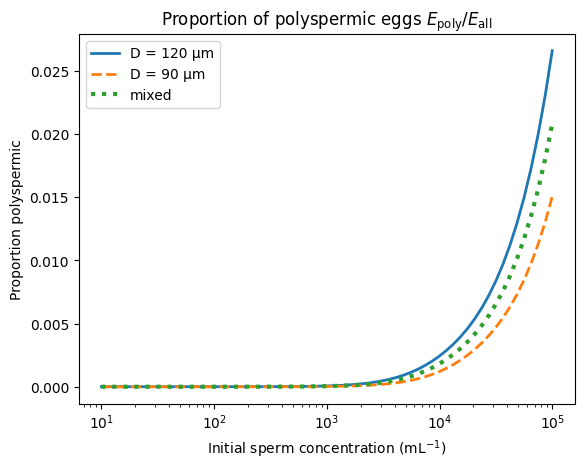

In [33]:
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_gd[:, -1], lw=2,
    label="D = 120 μm"
)
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_bd[:, -1], lw=2, ls="--",
    label="D = 90 μm"
)
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_mx[:, -1], lw=3, ls=":",
    label="mixed"
)

plt.title("Proportion of polyspermic eggs $E_\\text{poly} / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
#plt.ylim([0, 1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion polyspermic")
plt.legend(loc="upper left")

plt.savefig(base_dir / 'prop_poly_mixed.svg')
plt.savefig(base_dir / 'prop_poly_mixed.pdf')

plt.show()

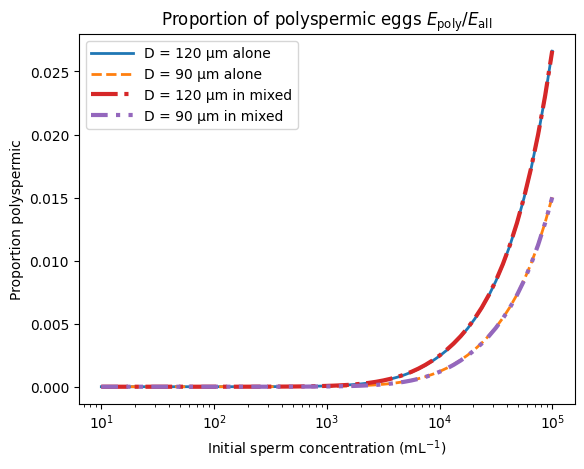

In [34]:
# trick to skip colors in the default plot color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = it.cycle(prop_cycle.by_key()['color'])

plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_gd[:, -1], lw=2, 
    c=next(colors), label="D = 120 μm alone"
)
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_bd[:, -1], lw=2, ls="--",
    c=next(colors), label="D = 90 μm alone"
)

next(colors)

plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_mx_gd[:, -1], lw=3, ls="-.",
    c=next(colors), label="D = 120 μm in mixed"
)
plt.plot(
    1E-6 * Sinit_array, norm_Epoly_S_mx_bd[:, -1], lw=3, ls=dashdotdot,
    c=next(colors), label="D = 90 μm in mixed"
)

plt.title("Proportion of polyspermic eggs $E_\\text{poly} / E_\\text{all}$")
plt.xscale("log")
#plt.yscale("log")
#plt.ylim([0, 1.1])
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Proportion polyspermic")
plt.legend(loc="upper left", handlelength=3)

plt.show()

Calculate ratio of (a) proportion fertilized and (b) proportional polyspermic, in the mixed case versus in the pure case

In [35]:
ratio_Eany_S_gd = norm_Eany_S_mx_gd / norm_Eany_S_gd
ratio_Eany_S_bd = norm_Eany_S_mx_bd / norm_Eany_S_bd

ratio_Epoly_S_gd = norm_Epoly_S_mx_gd / norm_Epoly_S_gd
ratio_Epoly_S_bd = norm_Epoly_S_mx_bd / norm_Epoly_S_bd

Plot the difference in proportion fertilized between the mixed and the alone cases, and save the resulting figure

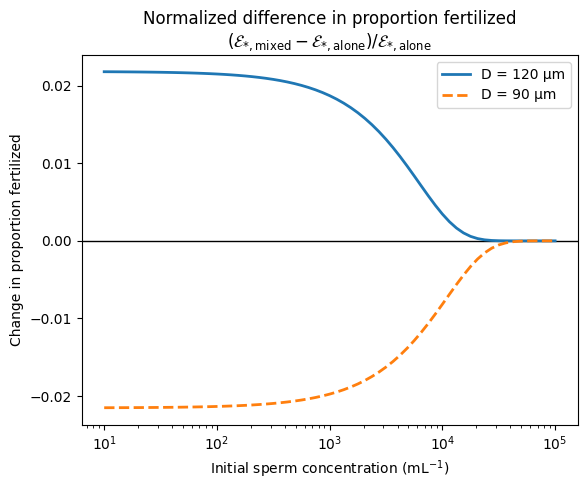

In [36]:
plt.axhline(0, lw=1, color="k")
plt.plot(
    1E-6 * Sinit_array, ratio_Eany_S_gd[:, -1] - 1, lw=2, 
    label="D = 120 μm"
)
plt.plot(
    1E-6 * Sinit_array, ratio_Eany_S_bd[:, -1] - 1, lw=2, ls="--",
    label="D = 90 μm"
)

title_text = (
    "Normalized difference in proportion fertilized\n" + 
    "$(\\mathcal{E}_{*,\\text{mixed}} - \\mathcal{E}_{*,\\text{alone}})" +
    " / \\mathcal{E}_{*,\\text{alone}}$"
)
plt.title(title_text)

plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Change in proportion fertilized")
plt.legend()

plt.savefig(base_dir / 'prop_fert_ratio_mixed.svg')
plt.savefig(base_dir / 'prop_fert_ratio_mixed.pdf')

plt.show()

Plot the difference in proportion polyspermy between the mixed and the alone cases, and save the resulting figure

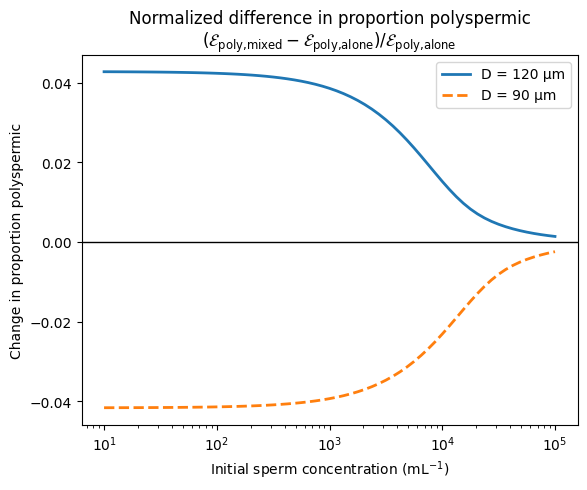

In [37]:
plt.axhline(0, lw=1, color="k")
plt.plot(
    1E-6 * Sinit_array, ratio_Epoly_S_gd[:, -1] - 1, lw=2, 
    label="D = 120 μm"
)
plt.plot(
    1E-6 * Sinit_array, ratio_Epoly_S_bd[:, -1] - 1, lw=2, ls="--",
    label="D = 90 μm"
)

title_text = (
    "Normalized difference in proportion polyspermic\n" + 
    "$(\\mathcal{E}_\\text{poly,mixed} - \\mathcal{E}_\\text{poly,alone})" + 
    " / \\mathcal{E}_\\text{poly,alone}$"
)
plt.title(title_text)
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Initial sperm concentration (mL$^{-1}$)")
plt.ylabel("Change in proportion polyspermic")
plt.legend()

plt.savefig(base_dir / 'prop_poly_ratio_mixed.svg')
plt.savefig(base_dir / 'prop_poly_ratio_mixed.pdf')

plt.show()

## Saving results

Construct the correct sperm concentration and time point labels for serialized numpy arrays

In [38]:
S_grid, t_grid = np.meshgrid(
    Sinit_array, t_array, indexing='ij'
)

Construct dataframes for the proportion fertilized and proportion polyspermic data for the "alone" cases

In [39]:
df_gd = pd.DataFrame({
    "time (s)": t_grid.ravel(),
    "Sinit (m^-3)": S_grid.ravel(),
    "E_* prop": norm_Eany_S_gd.ravel(),
    "E_poly prop": norm_Epoly_S_gd.ravel(),
})
df_bd = pd.DataFrame({
    "time (s)": t_grid.ravel(),
    "Sinit (m^-3)": S_grid.ravel(),
    "E_* prop": norm_Eany_S_bd.ravel(),
    "E_poly prop": norm_Epoly_S_bd.ravel(),
})

Construct the correct group, sperm concentration, and time point labels for serialized numpy arrays

In [40]:
group_mx, S_grid_mx, t_grid_mx = np.meshgrid(
    ["D = 120 μm", "D = 90 μm"], Sinit_array, t_array, 
    indexing='ij'
)

Construct dataframes for the "mixed" case

In [41]:
df_mx = pd.DataFrame({
    "time (s)": t_grid_mx.ravel(),
    "Sinit (m^-3)": S_grid_mx.ravel(),
    "group": group_mx.ravel(),
    "E_* prop": np.array([norm_Eany_S_mx_gd, norm_Eany_S_mx_bd]).ravel(),
    "E_poly prop": np.array([norm_Epoly_S_mx_gd, norm_Epoly_S_mx_bd]).ravel(),
    "E_* prop ratios": np.array([ratio_Eany_S_gd, ratio_Eany_S_bd]).ravel(),
    "E_poly prop ratios": np.array([ratio_Epoly_S_gd, ratio_Epoly_S_bd]).ravel(),

})

Write to Excel (with each dataframe a separate sheet)

In [42]:
with pd.ExcelWriter('multiple_eggs.xlsx', mode='w') as writer:  
    df_gd.to_excel(writer, sheet_name='good_only', index=False)
    df_bd.to_excel(writer, sheet_name='bad_only', index=False)
    df_mx.to_excel(writer, sheet_name='mixed', index=False)

Record the relevant parameters used and save to file

In [43]:
param_str = f'''
v_sperm = {v_const.item()}
d_sperm = {d_const.item()}
motile = {motile}

t_end = {t_end}

sigma0_good = {sigma0_gd.item()}
alpha_good = {alpha_const_gd.item()}
Einit_good = {Einit_gd.item()}

sigma0_bad = {sigma0_bd.item()}
alpha_bad = {alpha_const_bd.item()}
Einit_bad = {Einit_bd.item()}

Dt_poly = {Dt_poly}

Einit_mixed_good = {Einit_mx_gd}
Einit_mixed_bad = {Einit_mx_bd}
'''

In [44]:
with open(base_dir / "multi_eggs_params.txt", "w") as outfile:
    outfile.write(param_str)